In [1]:
# Import required packages
from os import path 
import time
from datetime import datetime
import numpy as np
import pandas as pd
import torch
from torch import nn, Tensor
from torch.optim import AdamW
from tqdm import tqdm, trange
import zuko
from zuko.flows import Distribution, NSF
from zuko.distributions import DiagNormal, BoxUniform, Minimum
from zuko.flows import DistributionModule, FlowModule, Unconditional
from hnne import HNNE

from utils.settings import config
from utils.utils import *
from utils.model import *
from utils.robot import Robot
from utils.dataset import create_dataset

In [11]:
panda = Robot(verbose=False)
# data generation
X, y = load_data(robot=panda)
# build dimension reduction model
hnne, ds, loader = get_hnne_model(X, y)
# Build Generative model, NSF
# Neural spline flow (NSF) with 3 sample features and 5 context features
flow, optimizer, scheduler = get_flow_model()

hnne load successfully from ./weights/hnne.pickle
Finding nearest centroids to new data...
Setting up once a knn index for the last level centroids...
Tue May 23 23:16:12 2023 Building RP forest with 32 trees
Tue May 23 23:16:17 2023 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Tue May 23 23:18:08 2023 Worst tree score: 0.94776730
Tue May 23 23:18:08 2023 Mean tree score: 0.94833365
Tue May 23 23:18:08 2023 Best tree score: 0.94900719
Tue May 23 23:18:12 2023 Forward diversification reduced edges from 20009880 to 6167103
Tue May 23 23:18:14 2023 Reverse diversification reduced edges from 6167103 to 6167102
Tue May 23 23:18:16 2023 Degree pruning reduced edges from 6697906 to 6697906
Tue May 23 23:18:16 2023 Resorting data and graph based on tree order
Tue May 23 23:18:17 2023 Building and compiling search function
Projecting data...
Model load successfully from ./weights/nsf.pth


,l2_err,log_prob
count,2400.000000,2400.000000
mean,0.007339,-9.020452
std,0.013705,2.264260
min,0.000206,-13.962763
25%,0.003095,-10.587358
50%,0.004776,-9.392077
75%,0.007263,-7.865105
max,0.249012,2.273649


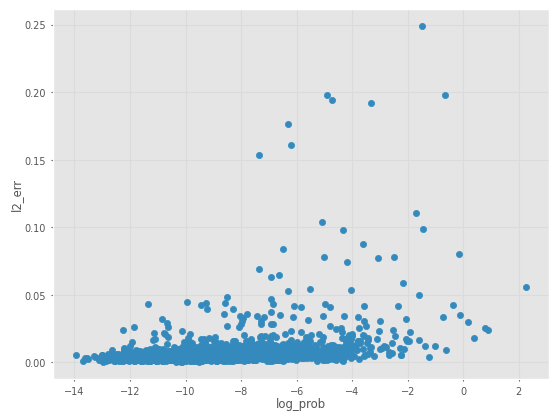

In [12]:
df, err = test_l2_err(config, robot=panda, loader=loader, model=flow)
ax1 = df.plot.scatter(x='log_prob', y='l2_err')
df.describe()

,l2_err,log_prob
count,2400.000000,2400.000000
mean,0.004650,-14.074973
std,0.003413,1.062123
min,0.000214,-16.826403
25%,0.002566,-14.798181
50%,0.004012,-14.127469
75%,0.005876,-13.482212
max,0.060900,-7.995215


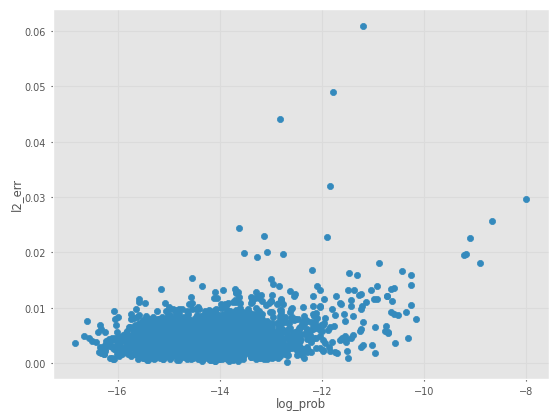

In [13]:
nflow = get_nflow_model(flow=flow)
df, err = test_l2_err(config, robot=panda, loader=loader, model=nflow)
ax1 = df.plot.scatter(x='log_prob', y='l2_err')
df.describe()

In [8]:
traj_dir = sample_ee_traj(robot=panda, load_time="05232300")

ee traj load successfully.


In [15]:
generate_traj_via_model(hnne=hnne, num_traj=3, model=nflow, robot=panda, traj_dir=traj_dir)

(array([3, 4]),)
[0.12987967 0.06128791]
0.3830662911820641
(array([], dtype=int64),)
[]
0.11292131828759196
(array([], dtype=int64),)
[]
0.07448857144266186
